# Day 15 CNN

In [1]:
#!pip install matplotlib

11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1546 - acc: 0.9539 - val_loss: 0.0605 - val_acc: 0.9793
Epoch 2/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0545 - acc: 0.9831 - val_loss: 0.0477 - val_acc: 0.9845
Epoch 3/8
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0346 - acc: 0.9890 - val_loss: 0.0434 - val_acc: 0.9855
Epoch 4/8
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0235 - acc: 0.9925 - val_loss: 0.0440 - val_acc: 0.9863
Epoch 5/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0156 - acc: 0.9951 - val_loss: 0.0437 - val_acc: 0.9853
Epoch 6/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0427 - val_acc: 0.9861
Epoch 7/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0102 - acc: 0.9964 - val_loss: 0.0491 - val_acc: 0.98

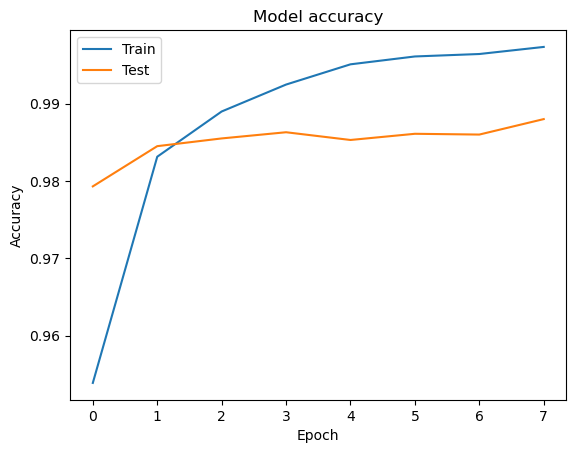

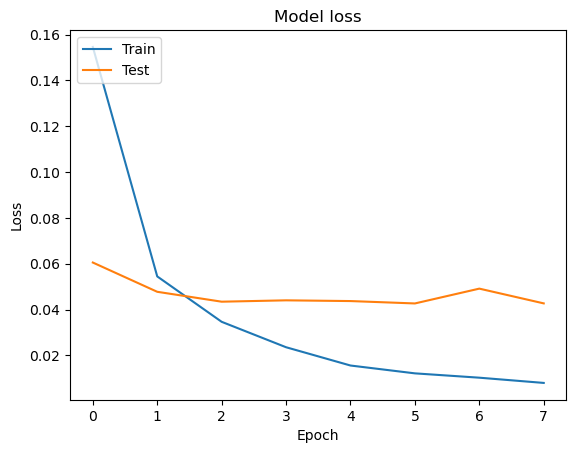

Saved model to disk


In [2]:
# Importing libraries
from keras.datasets import mnist # download the digit dataset
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential # arranging the layer in sequential order
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt # visualizing

# Load Dataset
( X_train, y_train) , (X_test, y_test) = mnist.load_data()

# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], X_test.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

#plt.axis('off')
#plt.imshow(X_test[47],cmap='gray')
#plt.show()

# Normalizing the pixel values
X_train = X_train/255
X_test = X_test/255

# One hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Neural Network
model=Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation='softmax'))  # Output layer

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Train the Model
history = model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 15, batch_size=128)

# list all data in history
print(history.history.keys())

# Evaluate the Model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# Graphical Representation of Accuracy & Loss Graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Save model
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")
